# Testing the MMCR data format

This notebook will be to test the data format that we load the MMCR data in as

In [1]:
# initial imports

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from load_xarray_from_mmcrmom import *

In [ ]:
target = '/home/users/eeasm/_scripts/ICESat2/src/mmcr'
ds = load_xarray_from_mmcrmom(target)
ds

In [ ]:
# plot the power
ds.where(ds.Power < 1e36).Power.plot(robust=True)

In [7]:
target = '/home/users/eeasm/_scripts/ICESat2/src/mmcr'
ds = read_radar_data(target,3,-20)
ds

<xarray.Dataset>
Dimensions:                        (time: 55868, heights: 234)
Coordinates:
    Heights                        (time, heights) float32 dask.array<chunksize=(2240, 234), meta=np.ndarray>
Dimensions without coordinates: time, heights
Data variables: (12/43)
    base_time                      (time, heights) datetime64[ns] dask.array<chunksize=(2240, 234), meta=np.ndarray>
    time_offset                    (time, heights) datetime64[ns] dask.array<chunksize=(2240, 234), meta=np.ndarray>
    ModeDescription                (time, heights) object dask.array<chunksize=(2240, 234), meta=np.ndarray>
    RxCalTimeStamp                 (time, heights) float64 dask.array<chunksize=(2240, 234), meta=np.ndarray>
    RxGain                         (time, heights) float32 dask.array<chunksize=(2240, 234), meta=np.ndarray>
    SkyNoiseLevel                  (time, heights) float32 dask.array<chunksize=(2240, 234), meta=np.ndarray>
    ...                             ...
    SpectralWidth                  (time, heights) float32 dask.array<chunksize=(2240, 234), meta=np.ndarray>
    NoiseLevel                     (time, heights) float32 dask.array<chunksize=(2240, 234), meta=np.ndarray>
    Reflectivity                   (time, heights) float32 dask.array<chunksize=(2240, 234), meta=np.ndarray>
    RangeCorrectedPower            (time, heights) float32 dask.array<chunksize=(2240, 234), meta=np.ndarray>
    CircularDepolarizationRatio    (time, heights) float32 dask.array<chunksize=(2240, 234), meta=np.ndarray>
    AvgNoiseLevel                  (time, heights) float32 dask.array<chunksize=(2240, 234), meta=np.ndarray>
Attributes: (12/13)
    site_id:                           Summit
    facility_id:                       Summit
    radar_operating_frequency:         34.86 GHz
    radar_wavelength:                  8.600115e-003 m
    peak_transmitted_power:            52.55 dBm
    peak_transmitted_power_timestamp:  -1291184121 s
    ...                                ...
    twt_status_code:                   100000000
    comment:                           DOE/ARM SGP MMCR netcdf raw file
    resolution_description:            The resolution field attributes refer ...
    proc_level:                        a1
    history:                           created by LAP-XM
    comment_on_time:                   The time stamp comes at the beginning ...

In [2]:
ds = ds.where(ds.SignalToNoiseRatio < 1e36)
ds

NameError: name 'ds' is not defined

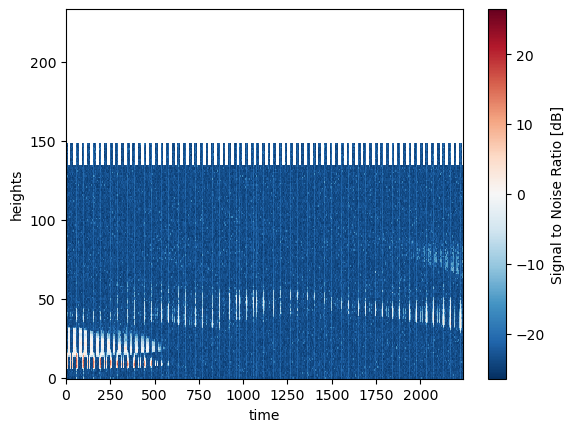

In [6]:
ds.SignalToNoiseRatio.plot(x='time')

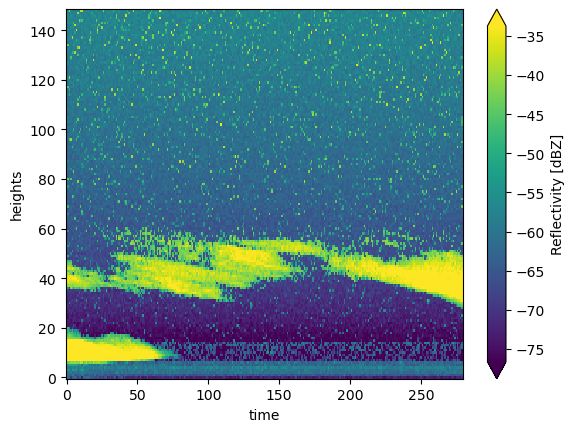

In [18]:
#ds = ds.set_coords(['time_offset','Heights'])
ds.where(ds.ModeNum==2,drop=True).Reflectivity.plot(x='time',robust=True)
#ds

/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/xarray/coding/variables.py:142: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


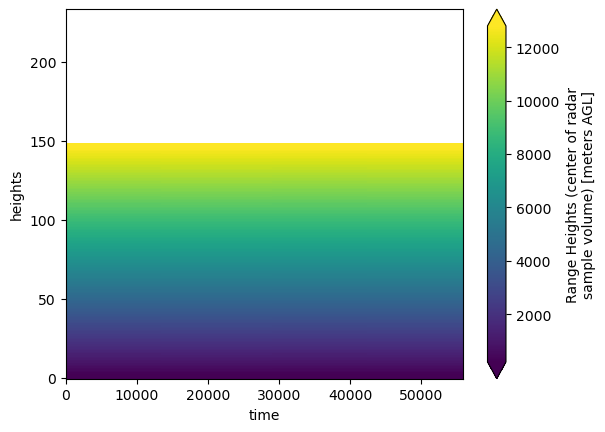

In [3]:
ds.Heights.plot(x='time',robust=True)

0 AxesSubplot(0.125,0.53;0.352273x0.35)


/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/xarray/coding/variables.py:142: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/xarray/coding/variables.py:142: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


1 AxesSubplot(0.547727,0.53;0.352273x0.35)


/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/xarray/coding/variables.py:142: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/xarray/coding/variables.py:142: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


2 AxesSubplot(0.125,0.11;0.352273x0.35)


/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/xarray/coding/variables.py:142: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/xarray/coding/variables.py:142: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


3 AxesSubplot(0.547727,0.11;0.352273x0.35)


/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/xarray/coding/variables.py:142: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/xarray/coding/variables.py:142: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


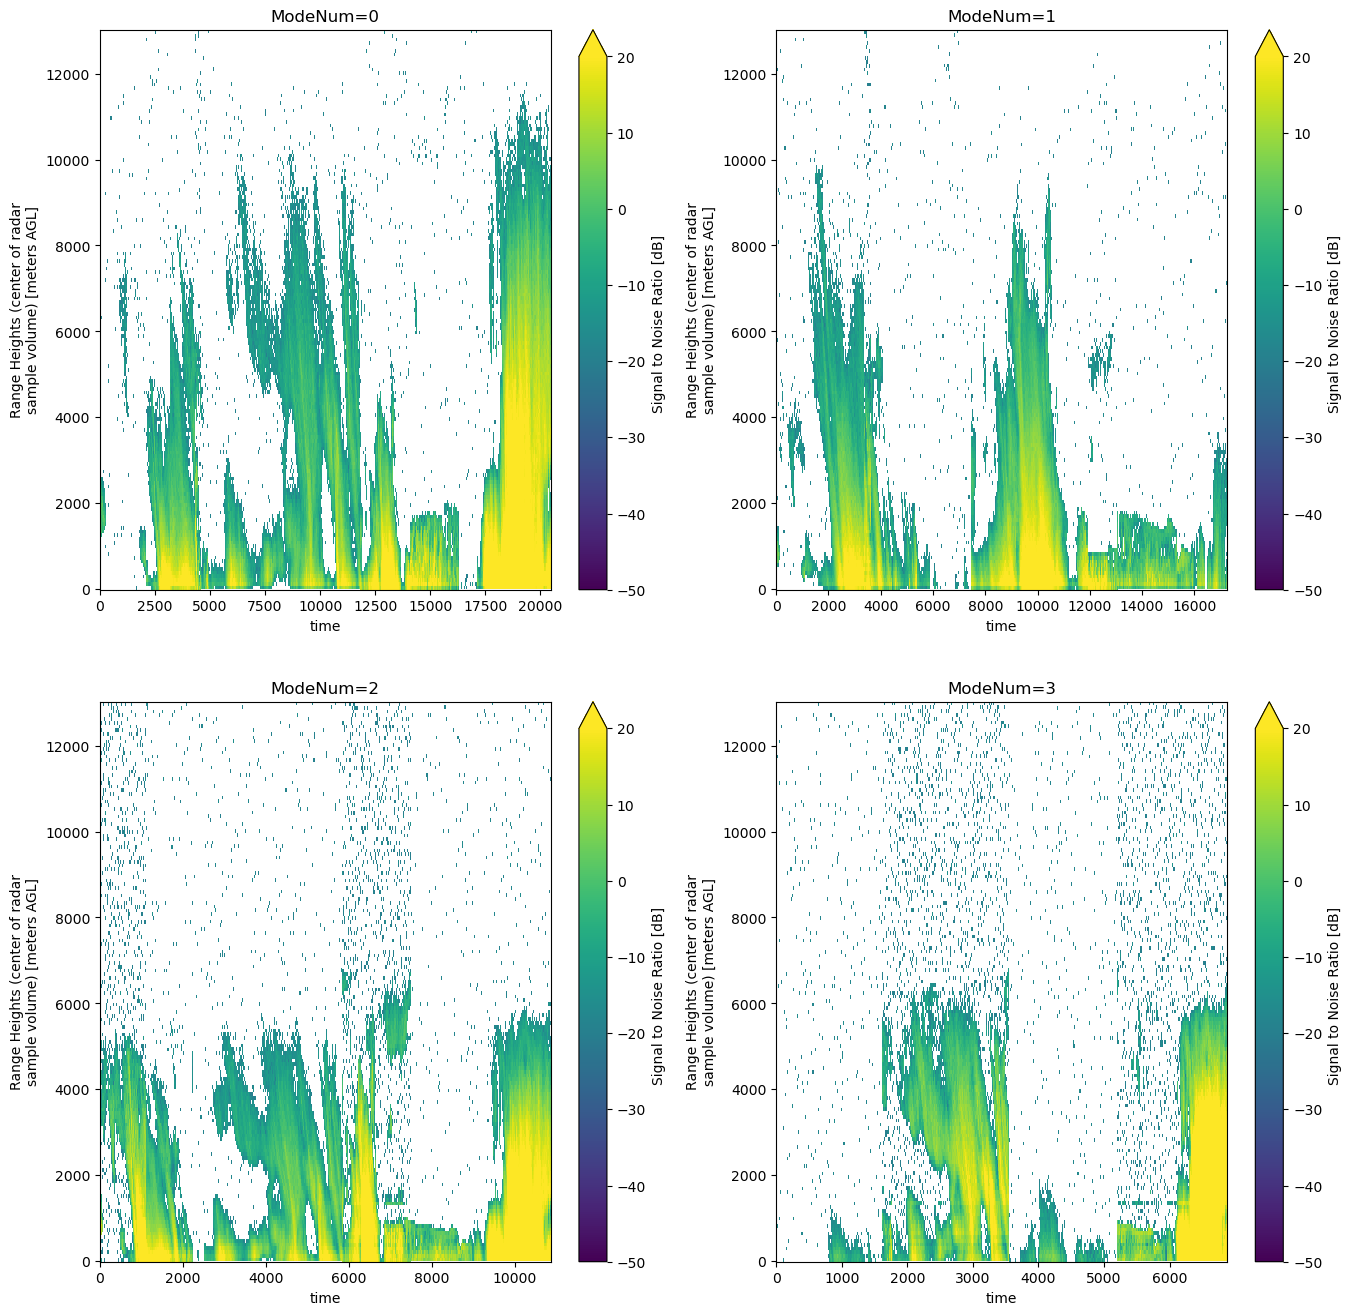

In [8]:
fig, axs = plt.subplots(2,2,figsize=(16,16))
axs = axs.flatten()

prop = 'SignalToNoiseRatio'

for i,ax in enumerate(axs):
    print(i,ax)
    ds.where(ds.ModeNum==i,drop=True)[prop].plot(x='time',y='Heights',robust=True, ax=ax,vmin=-50,vmax=20)
    ax.set_title(f'ModeNum={i}')

plt.show()